Copyright ©2021-2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Plot Heart Rate

In [9]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn

import utilities
from utilities import TimeCategories


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [10]:
project_path = Path.cwd().parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_preprocessed.pickle'
blood_pressure_pdf = project_path / 'reports' / 'blood_pressure.pdf'
blood_pressure_jpg = project_path / 'reports' / 'blood_pressure.jpg'

In [11]:
ds = pandas.read_pickle(heart_df_pickle)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181400 entries, 5 to 181404
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   value   181400 non-null  float64       
 1   type    181400 non-null  object        
 2   date    181400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.5+ MB


In [12]:
bpds = utilities.create_blood_pressure_dataset(ds)
bpds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 495
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            496 non-null    datetime64[ns]
 1   systolic        496 non-null    float64       
 2   diastolic       496 non-null    float64       
 3   pulse pressure  496 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 19.4 KB


In [13]:
bpds.head()

,date,systolic,diastolic,pulse pressure
0,2021-08-06 20:53:00,153.0,79.0,74.0
1,2021-08-06 20:58:00,136.0,85.0,51.0
2,2021-08-06 23:13:00,135.0,77.0,58.0
3,2021-08-07 01:14:00,121.0,73.0,48.0
4,2021-08-07 22:21:00,132.0,71.0,61.0


In [14]:
start = bpds.date.min()
end = bpds.date.max()

categories = TimeCategories(start, end)
categories

TimeCategories(start_date=Timestamp('2021-08-15 01:25:00'), end_date=Timestamp('2022-01-01 01:25:00'), bin_size=14, bin_count=10)

In [15]:
bpds['bucket'] = bpds['date'].apply(categories.get_category)
bpds.tail()

,date,systolic,diastolic,pulse pressure,bucket
491,2021-12-31 01:19:00,137.0,78.0,59.0,2022-01-01
492,2021-12-31 21:59:00,114.0,70.0,44.0,2022-01-01
493,2021-12-31 23:13:00,134.0,81.0,53.0,2022-01-01
494,2022-01-01 00:11:00,135.0,79.0,56.0,2022-01-01
495,2022-01-01 01:25:00,137.0,81.0,56.0,2022-01-01


[Text(0.5, 0, '14 Day Intervals. (last day shown)'),
 Text(0, 0.5, 'observation count')]

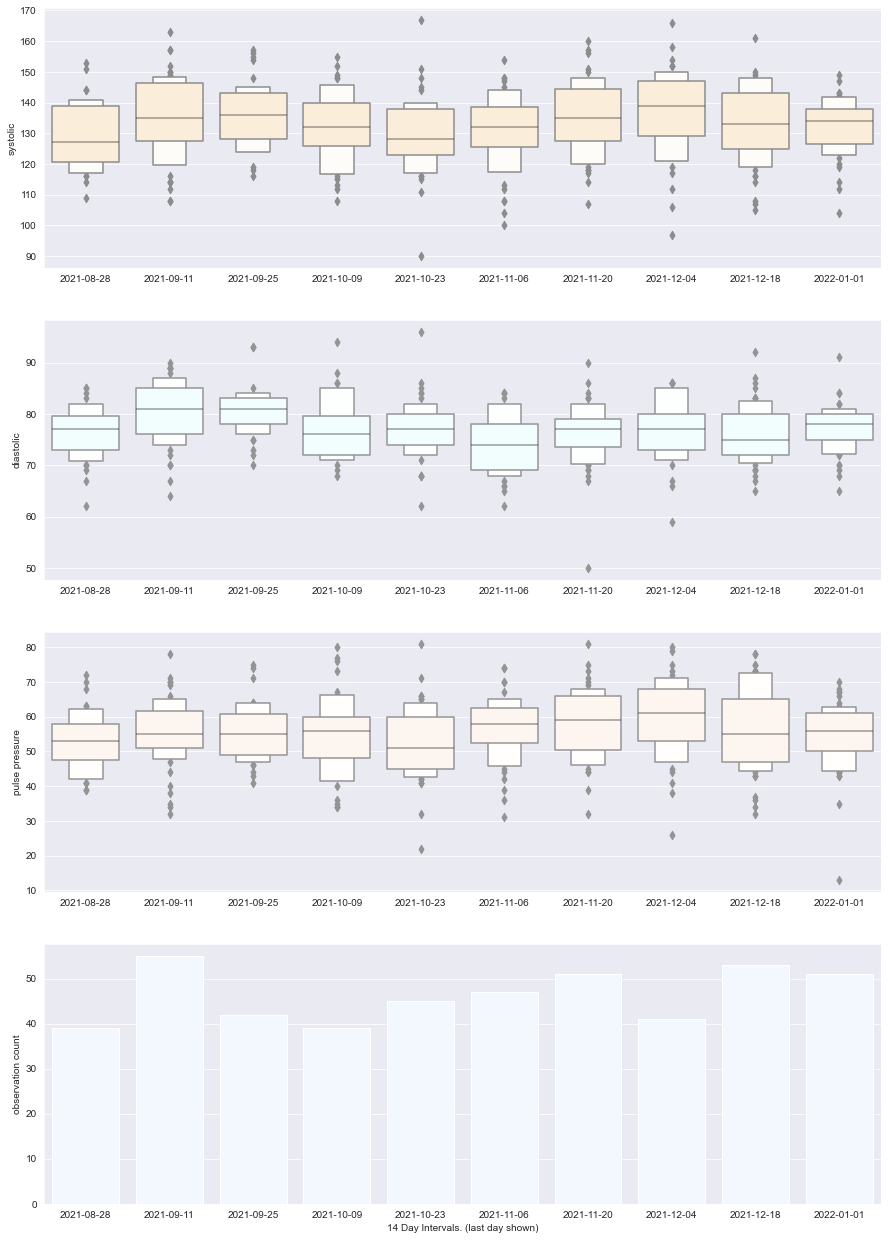

In [16]:
fig, axes = pyplot.subplots(nrows=4, ncols=1, figsize=(15, 22))

# Plot systolic
seaborn.boxenplot(data=bpds,
                  x='bucket', y='systolic',
                  ax=axes[0], palette=['papayawhip'])

# Plot diastolic
seaborn.boxenplot(data=bpds,
                  x='bucket', y='diastolic',
                  ax=axes[1], palette=['azure'])

# Plot pulse pressure
seaborn.boxenplot(data=bpds,
                  x='bucket', y='pulse pressure',
                  ax=axes[2], palette=['seashell'])

# Plot observation counts
seaborn.countplot(data=bpds,
                  x='bucket',
                  ax=axes[3], palette=['aliceblue'])

axes[0].set(xlabel=None)
axes[1].set(xlabel=None)
axes[2].set(xlabel=None)
axes[3].set(xlabel=f"{categories.bin_size} Day Intervals. (last day shown)", ylabel='observation count')

In [17]:
# Save the plots
fig.savefig(blood_pressure_jpg)
fig.savefig(blood_pressure_pdf)